In [1]:
import numpy as np
from numpy import array
import matplotlib.pyplot as plt
%matplotlib inline

import operator
from os import listdir

from pylab import *

# import seaborn as sns

In [ ]:
# create dataset

def create_dataset():
    group = np.array([[1.0, 1.1], [1.0, 1.0], [0, 0], [0, 0.1], [0.5, 0.6], [0.7, 0.8]])
    labels = ['A', 'B', 'A', 'B',  'A', 'B']
    return group, labels

group, labels = create_dataset()

In [ ]:
group

In [ ]:
plt.scatter(group[0], group[1])
plt.scatter(1, 0.5, c='red')

In [ ]:
group.shape

In [ ]:
labels

In [ ]:
inX = [1, 0.5]

In [ ]:
dataset_size = group.shape[0]
diffmat = np.tile(inX, (dataset_size,1)) - group
sq_diffmat = diffmat ** 2
sq_distances = sq_diffmat.sum(axis=1)
distances = sq_distances ** 0.5

In [ ]:
distances

In [ ]:
distances.argsort()

In [ ]:
# 实现k-近邻算法

def classify0(inX, dataset, labels, k):
    
    # 计算输入数据与样本之间的距离——欧氏距离
    dataset_size = dataset.shape[0]
    diffmat = np.tile(inX, (dataset_size,1)) - dataset
    sq_diffmat = diffmat ** 2
    sq_distances = sq_diffmat.sum(axis=1)
    distances = sq_distances ** 0.5
    
    # labels排序
    indicies = distances.argsort()
    sorted_labels = np.zeros(len(labels), np.str)
    for key, value in enumerate(indicies):
        sorted_labels[key] = labels[value]
    
    # 以字典的方式获取每个label的计数
    countDict = {}
    for i in range(k):
        labelVoted = sorted_labels[i]
        countDict[labelVoted] = countDict.get(labelVoted,0) + 1
        
    # 返回计数最多的那个label
    sortedCountDict = sorted(countDict.items(), key=operator.itemgetter(1), reverse=True)
    print(countDict)
    print(countDict.items())
    print(sortedCountDict)
    return sortedCountDict[0][0]

In [ ]:
classify0(inX, group, labels, 3)

In [2]:
# 实现k-近邻算法

def classify1(inX, dataset, labels, k):
    
    # 计算输入数据与样本之间的距离——欧氏距离
    dataset_size = dataset.shape[0]
    diffmat = np.tile(inX, (dataset_size,1)) - dataset
    sq_diffmat = diffmat ** 2
    sq_distances = sq_diffmat.sum(axis=1)
    distances = sq_distances ** 0.5
    
    # labels排序
    indicies = distances.argsort()
    
    # 以字典的方式获取每个label的计数
    countDict = {}
    for i in range(k):
        labelVoted = labels[indicies[i]]
        countDict[labelVoted] = countDict.get(labelVoted, 0) + 1
    sortedCountDict = sorted(countDict.items(), key=operator.itemgetter(1), reverse=True)
    
#     print(countDict)
#     print(sortedCountDict)
    
    return sortedCountDict[0][0]

In [ ]:
classify1(inX, group, labels, 3)

## 约会网站

In [2]:
f = open('./MLiA_SourceCode/machinelearninginaction/Ch02/datingTestSet2.txt')

In [3]:
fr = f.readlines()

In [4]:
fr[0:3]

['40920\t8.326976\t0.953952\t3\n',
 '14488\t7.153469\t1.673904\t2\n',
 '26052\t1.441871\t0.805124\t1\n']

In [ ]:
fr1 = fr[0]

In [ ]:
fr1

In [ ]:
fr2 = fr1.strip()

In [ ]:
fr3 = fr2.split('\t')

In [ ]:
fr3

In [ ]:
fr3[0:3]

In [ ]:
fr3[-1]

In [94]:
#读取输入数据labels,features
def file2matrix(filename):
    f = open(filename)
    fl = f.readlines()
    lenF = len(fl)
    features = np.zeros((lenF,3))
    labels = []
    for key,value in enumerate(fl):
        rawData = value.strip()
        realData = rawData.split('\t') 
        features[key] = realData[0:3]
        labels.append(int(realData[-1]))
    return features, labels

In [95]:
features,labels = file2matrix('./MLiA_SourceCode/machinelearninginaction/Ch02/datingTestSet2.txt')

In [55]:
features

array([[4.0920000e+04, 8.3269760e+00, 9.5395200e-01],
       [1.4488000e+04, 7.1534690e+00, 1.6739040e+00],
       [2.6052000e+04, 1.4418710e+00, 8.0512400e-01],
       ...,
       [2.6575000e+04, 1.0650102e+01, 8.6662700e-01],
       [4.8111000e+04, 9.1345280e+00, 7.2804500e-01],
       [4.3757000e+04, 7.8826010e+00, 1.3324460e+00]])

In [6]:
labels[:20]

[3, 2, 1, 1, 1, 1, 3, 3, 1, 3, 1, 1, 2, 1, 1, 1, 1, 1, 2, 3]

<function matplotlib.pyplot.show(*args, **kw)>

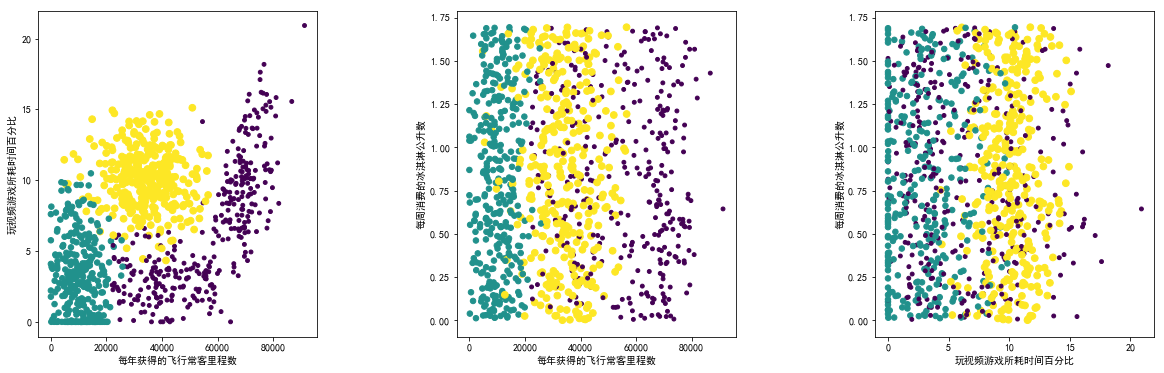

In [21]:
#创建散点图
mpl.rcParams['font.sans-serif'] = ['SimHei']

plt.figure(figsize=(20,6))
plt.subplots_adjust(wspace=0.5, hspace=0.5)

plt.subplot(131)
plt.scatter(features[:,0], features[:,1], 15.0*array(labels), 15.0*array(labels))
plt.xlabel('每年获得的飞行常客里程数')
plt.ylabel('玩视频游戏所耗时间百分比')
plt.legend

plt.subplot(132)
plt.scatter(features[:,0], features[:,2], 15.0*array(labels), 15.0*array(labels))
plt.xlabel('每年获得的飞行常客里程数')
plt.ylabel('每周消费的冰淇淋公升数')
plt.legend

plt.subplot(133)
plt.scatter(features[:,1], features[:,2], 15.0*array(labels), 15.0*array(labels))
plt.xlabel('玩视频游戏所耗时间百分比')
plt.ylabel('每周消费的冰淇淋公升数')
plt.legend

plt.show

In [66]:
# 查看第一特征和第二特征的关系

type1_x = []   #一共有3类，所以定义3个空列表准备接受数据
type1_y = []
type2_x = []
type2_y = []
type3_x = []
type3_y = []
 
for i in range(len(labels)):
    if labels[i] == 1: 
#         print(features[i][0], features[i][1], labels[i], i)
        type1_x.append(features[i][0])
        type1_y.append(features[i][1])
#         break
 
    elif labels[i] == 2:
#         print(features[i][0], features[i][1], labels[i], i)
        type2_x.append(features[i][0])
        type2_y.append(features[i][1])
#         break
 
    else:
#         print(features[i][0], features[i][1], labels[i], i)
        type3_x.append(features[i][0])
        type3_y.append(features[i][1])
#         break

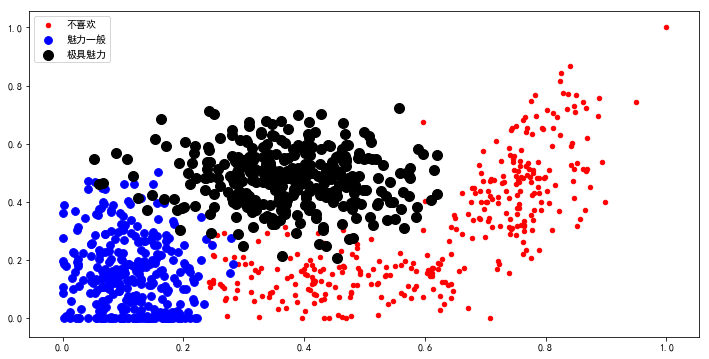

In [67]:
plt.figure(figsize=(12,6))
mpl.rcParams['font.sans-serif'] = ['SimHei']

plt.scatter(type1_x, type1_y, 20, 'red', label='不喜欢')
plt.scatter(type2_x, type2_y, 60, 'blue', label='魅力一般')
plt.scatter(type3_x, type3_y, 100, 'black', label='极具魅力')

plt.legend()
plt.show()

In [43]:
minvalue = features.min(axis=0)

In [39]:
features.max(axis=0)

array([9.1273000e+04, 2.0919349e+01, 1.6955170e+00])

In [41]:
m = features.shape[0]

In [47]:
a = tile(minvalue, (m,1))

In [48]:
a.shape

(1000, 3)

In [64]:
# 数据归一化

def autoNorm(features):
    minValue = features.min(axis=0)
    maxValue = features.max(axis=0)
    ranges = maxValue - minValue
    n = features.shape[0]
    normFeatures = np.zeros(shape(features))
    
    normFeatures = features - tile(minValue, (n,1))
    normFeatures = normFeatures/tile(ranges, (n,1))
    
#     for feature in features:
#         for key, value in enumerate(feature):
#             feature[key] = (value - minValue) / ranges
    
    return normFeatures, ranges, minValue

In [65]:
features, ranges, minValue = autoNorm(features)

In [88]:
# 分类器针对约会网站数据的测试

def datingTest(filepath):
    hoRatio = 0.1
    features,labels = file2matrix(filepath)
    normFeaures, ranges, minValues = autoNorm(features)
    m = normFeaures.shape[0]
    numTestVecs = int(m*hoRatio)
    errorCount = 0.0
    
    for i in range(numTestVecs):
        classfierResult = classify1(normFeaures[i], normFeaures[numTestVecs:m], labels[numTestVecs:m], 3)
        print('预测结果：{}，实际结果：{}'.format(classfierResult, labels[i]))
        
        if classfierResult != labels[i]:
            errorCount += 1.0
            
    print('------------------------------------------------------')
    print('总错误率：{}'.format(errorCount/float(numTestVecs)))

In [89]:
datingTest('./MLiA_SourceCode/machinelearninginaction/Ch02/datingTestSet2.txt')

预测结果：3，实际结果：3
预测结果：2，实际结果：2
预测结果：1，实际结果：1
预测结果：1，实际结果：1
预测结果：1，实际结果：1
预测结果：1，实际结果：1
预测结果：3，实际结果：3
预测结果：3，实际结果：3
预测结果：1，实际结果：1
预测结果：3，实际结果：3
预测结果：1，实际结果：1
预测结果：1，实际结果：1
预测结果：2，实际结果：2
预测结果：1，实际结果：1
预测结果：1，实际结果：1
预测结果：1，实际结果：1
预测结果：1，实际结果：1
预测结果：1，实际结果：1
预测结果：2，实际结果：2
预测结果：3，实际结果：3
预测结果：2，实际结果：2
预测结果：1，实际结果：1
预测结果：1，实际结果：2
预测结果：3，实际结果：3
预测结果：2，实际结果：2
预测结果：3，实际结果：3
预测结果：2，实际结果：2
预测结果：3，实际结果：3
预测结果：2，实际结果：2
预测结果：1，实际结果：1
预测结果：3，实际结果：3
预测结果：1，实际结果：1
预测结果：3，实际结果：3
预测结果：1，实际结果：1
预测结果：2，实际结果：2
预测结果：1，实际结果：1
预测结果：1，实际结果：1
预测结果：2，实际结果：2
预测结果：3，实际结果：3
预测结果：3，实际结果：3
预测结果：1，实际结果：1
预测结果：2，实际结果：2
预测结果：3，实际结果：3
预测结果：3，实际结果：3
预测结果：3，实际结果：3
预测结果：1，实际结果：1
预测结果：1，实际结果：1
预测结果：1，实际结果：1
预测结果：1，实际结果：1
预测结果：2，实际结果：2
预测结果：2，实际结果：2
预测结果：1，实际结果：1
预测结果：3，实际结果：3
预测结果：2，实际结果：2
预测结果：2，实际结果：2
预测结果：2，实际结果：2
预测结果：2，实际结果：2
预测结果：3，实际结果：3
预测结果：1，实际结果：1
预测结果：2，实际结果：2
预测结果：1，实际结果：1
预测结果：2，实际结果：2
预测结果：2，实际结果：2
预测结果：2，实际结果：2
预测结果：2，实际结果：2
预测结果：2，实际结果：2
预测结果：3，实际结果：3
预测结果：2，实际结果：2
预测结果：3，实际结果：3
预测结果：1，实际结果：1
预测结果：2，实际结果：2
预测结果：3

In [107]:
# 预测程序
def classifyPerson(filepath):
    resultList = ['不喜欢', '魅力一般', '极具魅力']
    features,labels = file2matrix(filepath)
    normFeaures, ranges, minValues = autoNorm(features)
    
    print('请输入这个人的情况：')
    feature_0 = float(input('每年获得的飞行常客里程数：'))
    feature_1 = float(input('请输入玩视频游戏所耗时间百分比：'))
    feature_2 = float(input('每周消费的冰淇淋公升数：'))
    
    intX = np.array([feature_0, feature_1, feature_2])
    normIntX = (intX - minValues) / ranges
    
    classifyResult = classify1(normIntX, normFeaures, labels, 3)
    
    
    print('------------------------------------------------------')
    print('你对这个人的态度：{}'.format(resultList[classifyResult - 1]))  

In [108]:
classifyPerson('./MLiA_SourceCode/machinelearninginaction/Ch02/datingTestSet2.txt')

请输入这个人的情况：
每年获得的飞行常客里程数：111
请输入玩视频游戏所耗时间百分比：111
每周消费的冰淇淋公升数：111
------------------------------------------------------
你对这个人的态度：极具魅力


## 手写系统

In [3]:
# 读取图像信息，转换为1 x 1024的向量
def img2vector(filename):
    returnVect = np.zeros((1,1024))
    f = open(filename)
    for i in range(32):
        lineStr = f.readline()
        for j in range(32):
            returnVect[0, 32*i+j] = int(lineStr[j])
    return returnVect

In [4]:
testVector = img2vector('./MLiA_SourceCode/machinelearninginaction/Ch02/digits/trainingDigits/6_3.txt')

In [14]:
# 使用kNN算法识别手写数字
def handWritingClassTest(trainpath, testpath, k):
    trainDataList = listdir(trainpath)
    testDataList = listdir(testpath)
#     trainFilePath = './MLiA_SourceCode/machinelearninginaction/Ch02/digits/trainingDigits/'
#     testFilePath = './MLiA_SourceCode/machinelearninginaction/Ch02/digits/testDigits/'
    trainFileList = [trainpath + file for file in trainDataList]
    testFileList = [testpath + file for file in testDataList]
    m =  len(trainFileList)
    n = len(testFileList)
    features = np.zeros((m, 1024))
    testVect= np.zeros((n, 1024))
    labels = []
    testLabels = []
    errorCount = 0.0
    
    for key,file in enumerate(trainFileList):
        returnVect = img2vector(file)
        features[key] = returnVect
    
    for file in trainDataList:
        index = file.rfind('_')
        label = file[:index]
        labels.append(label)
        
    for key,file in enumerate(testFileList):
        returnVect = img2vector(file)
        testVect[key] = returnVect
        
    for file in testDataList:
        index = file.rfind('_')
        label = file[:index]
        testLabels.append(label)
    
    for i in range(n):
        classfierResult = classify1(testVect[i], features, labels, k)
        print('预测结果：{}，实际结果：{}'.format(classfierResult, testLabels[i]))
        
        if classfierResult != testLabels[i]:
            errorCount += 1.0
            
    print('------------------------------------------------------')
    print('总错误率：{}'.format(errorCount/float(n)))

In [17]:
handWritingClassTest('./MLiA_SourceCode/machinelearninginaction/Ch02/digits/trainingDigits/', 
                     './MLiA_SourceCode/machinelearninginaction/Ch02/digits/testDigits/', 
                    3)

预测结果：0，实际结果：0
预测结果：0，实际结果：0
预测结果：0，实际结果：0
预测结果：0，实际结果：0
预测结果：0，实际结果：0
预测结果：0，实际结果：0
预测结果：0，实际结果：0
预测结果：0，实际结果：0
预测结果：0，实际结果：0
预测结果：0，实际结果：0
预测结果：0，实际结果：0
预测结果：0，实际结果：0
预测结果：0，实际结果：0
预测结果：0，实际结果：0
预测结果：0，实际结果：0
预测结果：0，实际结果：0
预测结果：0，实际结果：0
预测结果：0，实际结果：0
预测结果：0，实际结果：0
预测结果：0，实际结果：0
预测结果：0，实际结果：0
预测结果：0，实际结果：0
预测结果：0，实际结果：0
预测结果：0，实际结果：0
预测结果：0，实际结果：0
预测结果：0，实际结果：0
预测结果：0，实际结果：0
预测结果：0，实际结果：0
预测结果：0，实际结果：0
预测结果：0，实际结果：0
预测结果：0，实际结果：0
预测结果：0，实际结果：0
预测结果：0，实际结果：0
预测结果：0，实际结果：0
预测结果：0，实际结果：0
预测结果：0，实际结果：0
预测结果：0，实际结果：0
预测结果：0，实际结果：0
预测结果：0，实际结果：0
预测结果：0，实际结果：0
预测结果：0，实际结果：0
预测结果：0，实际结果：0
预测结果：0，实际结果：0
预测结果：0，实际结果：0
预测结果：0，实际结果：0
预测结果：0，实际结果：0
预测结果：0，实际结果：0
预测结果：0，实际结果：0
预测结果：0，实际结果：0
预测结果：0，实际结果：0
预测结果：0，实际结果：0
预测结果：0，实际结果：0
预测结果：0，实际结果：0
预测结果：0，实际结果：0
预测结果：0，实际结果：0
预测结果：0，实际结果：0
预测结果：0，实际结果：0
预测结果：0，实际结果：0
预测结果：0，实际结果：0
预测结果：0，实际结果：0
预测结果：0，实际结果：0
预测结果：0，实际结果：0
预测结果：0，实际结果：0
预测结果：0，实际结果：0
预测结果：0，实际结果：0
预测结果：0，实际结果：0
预测结果：0，实际结果：0
预测结果：0，实际结果：0
预测结果：0，实际结果：0
预测结果：0，实际结果：0
预测结果：0，实际结果：0
预测结果：0

预测结果：6，实际结果：6
预测结果：6，实际结果：6
预测结果：6，实际结果：6
预测结果：6，实际结果：6
预测结果：6，实际结果：6
预测结果：6，实际结果：6
预测结果：6，实际结果：6
预测结果：6，实际结果：6
预测结果：6，实际结果：6
预测结果：6，实际结果：6
预测结果：6，实际结果：6
预测结果：6，实际结果：6
预测结果：6，实际结果：6
预测结果：6，实际结果：6
预测结果：6，实际结果：6
预测结果：6，实际结果：6
预测结果：6，实际结果：6
预测结果：6，实际结果：6
预测结果：6，实际结果：6
预测结果：6，实际结果：6
预测结果：6，实际结果：6
预测结果：6，实际结果：6
预测结果：6，实际结果：6
预测结果：6，实际结果：6
预测结果：6，实际结果：6
预测结果：6，实际结果：6
预测结果：6，实际结果：6
预测结果：6，实际结果：6
预测结果：6，实际结果：6
预测结果：6，实际结果：6
预测结果：6，实际结果：6
预测结果：6，实际结果：6
预测结果：6，实际结果：6
预测结果：6，实际结果：6
预测结果：6，实际结果：6
预测结果：6，实际结果：6
预测结果：6，实际结果：6
预测结果：6，实际结果：6
预测结果：6，实际结果：6
预测结果：6，实际结果：6
预测结果：6，实际结果：6
预测结果：6，实际结果：6
预测结果：6，实际结果：6
预测结果：6，实际结果：6
预测结果：6，实际结果：6
预测结果：6，实际结果：6
预测结果：6，实际结果：6
预测结果：6，实际结果：6
预测结果：6，实际结果：6
预测结果：6，实际结果：6
预测结果：6，实际结果：6
预测结果：6，实际结果：6
预测结果：6，实际结果：6
预测结果：6，实际结果：6
预测结果：6，实际结果：6
预测结果：6，实际结果：6
预测结果：6，实际结果：6
预测结果：6，实际结果：6
预测结果：6，实际结果：6
预测结果：6，实际结果：6
预测结果：6，实际结果：6
预测结果：6，实际结果：6
预测结果：6，实际结果：6
预测结果：6，实际结果：6
预测结果：6，实际结果：6
预测结果：6，实际结果：6
预测结果：6，实际结果：6
预测结果：6，实际结果：6
预测结果：6，实际结果：6
预测结果：6，实际结果：6
预测结果：6，实际结果：6
预测结果：6